# Results

In [1]:
import pandas as pd


metrics = [
        "accuracy",
        "balanced_accuracy",
        "f1",
        "precision",
        "recall",
        "specificity",
        "ROC_AUC",
        "MCC",
    ]

In [2]:
import os


all_models_results = {}
main_result_folder = os.path.join(".", "results")
datasets = ["hyperactiv", "psykose", "depresjon"]
models = ["LR", "RF", "SVM"]
types = ["full_24h", "night", "day"]

for dataset in datasets:
    paths_to_results_folder = os.path.join(main_result_folder, dataset)
    all_models_results[dataset] = {}
    for t in types:
        all_models_results[dataset][t] = []
        for model in models:
            model_mean_results = pd.read_csv(os.path.join(paths_to_results_folder, f"final_scores_{t}_{model}"))["Mean"]
            model_mean_results.index = metrics
            model_mean_results.name = f"{t} {model}"
            all_models_results[dataset][t].append(model_mean_results)
            

In [3]:
all_models_results

{'hyperactiv': {'full_24h': [accuracy             0.505337
   balanced_accuracy    0.510562
   f1                   0.466559
   precision            0.538889
   recall               0.422222
   specificity          0.598901
   ROC_AUC              0.510562
   MCC                  0.020234
   Name: full_24h LR, dtype: float64,
   accuracy             0.422003
   balanced_accuracy    0.421062
   f1                   0.447619
   precision            0.439744
   recall               0.466667
   specificity          0.375458
   ROC_AUC              0.421062
   MCC                 -0.155459
   Name: full_24h RF, dtype: float64,
   accuracy             0.529557
   balanced_accuracy    0.500000
   f1                   0.692389
   precision            0.529557
   recall               1.000000
   specificity          0.000000
   ROC_AUC              0.500000
   MCC                  0.000000
   Name: full_24h SVM, dtype: float64],
  'night': [accuracy             0.481938
   balanced_accuracy    

In [4]:
import os

paths_to_results_folder = os.path.join(".", "results", "hyperactiv")
results_hyperactive_day = []

for model in ["final_scores_day_RF", "final_scores_day_SVM", "final_scores_day_LR"]:
    model_mean_results = pd.read_csv(os.path.join(paths_to_results_folder, model))["Mean"]
    model_mean_results.index = metrics
    name_parts = model.split("_")
    model_mean_results.name = f"{name_parts[-2]} {name_parts[-1]}"
    results_hyperactive_day.append(model_mean_results)

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plot_final_results(
        models_final_results: list[pd.Series], 
        title: str, 
        one_plot: bool = False, 
        figsize: tuple[float, float] = (10, 6)
) -> None:
    df = pd.concat(models_final_results, axis=1)
    
    if one_plot:
        df.plot(kind='bar', figsize=figsize)
        plt.title(title)
        plt.xlabel('Metrics')
        plt.xticks(rotation=45)
        plt.ylabel('Values')
        plt.legend(title="Models")
        plt.tight_layout()
        plt.show()
    else:
        num_models = len(df.columns)
        colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
        
        num_metrics = len(df.index)
        fig, axes = plt.subplots(nrows=(num_metrics + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

        axes = axes.flatten()
        
        for ax, metric in zip(axes, df.index):
            ax.bar(df.columns, df.loc[metric], color=colors)
            ax.set_title(f'{title}: {metric}')
            ax.set_xlabel('Models')
            ax.set_ylabel('Value')
        
        for ax in axes[len(df.index):]:
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

In [6]:
def plot_model_comparison(results: dict[str, list[pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = ["full_24h", "night", "day"]
    
    num_models = len(types)
    colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
    
    fig, axes = plt.subplots(nrows=(len(metrics) + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        data = {}
        for t in types:
            for result in results[t]:
                model_t, model_name = result.name.split()
                data[model_name] = data.get(model_name, []) + [result.iloc[i]]
                
        df = pd.DataFrame(data, index=types)
        
        df.plot(kind='bar', ax=ax)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Value')

    
    plt.tight_layout()
    plt.show()

In [7]:
def plot_day_night_full_comparison(results: dict[str, list[pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = ["full_24h", "night", "day"]
    
    num_models = len(types)
    colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
    
    fig, axes = plt.subplots(nrows=(len(metrics) + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        data = {}
        for t in types:
            for result in results[t]:
                model_t, model_name = result.name.split()
                data[model_t] = data.get(model_t, []) + [result.iloc[i]]
        
                
        df = pd.DataFrame(data, index=models)
        
        df.plot(kind='bar', ax=ax)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Value')

    
    plt.tight_layout()
    plt.show()

## Plots

### Hyperactiv

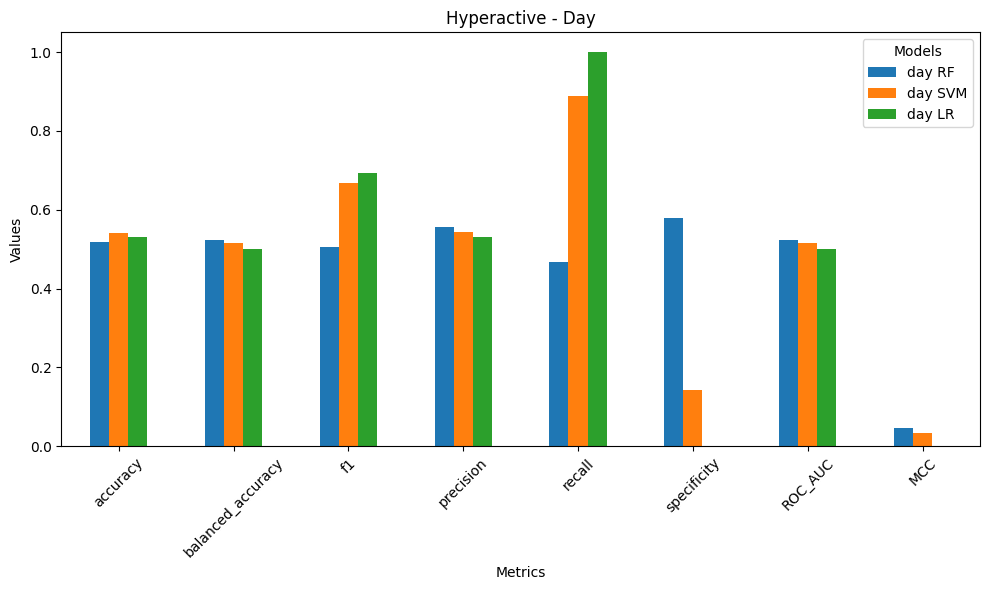

In [8]:
plot_final_results(results_hyperactive_day, "Hyperactive - Day", one_plot=True)

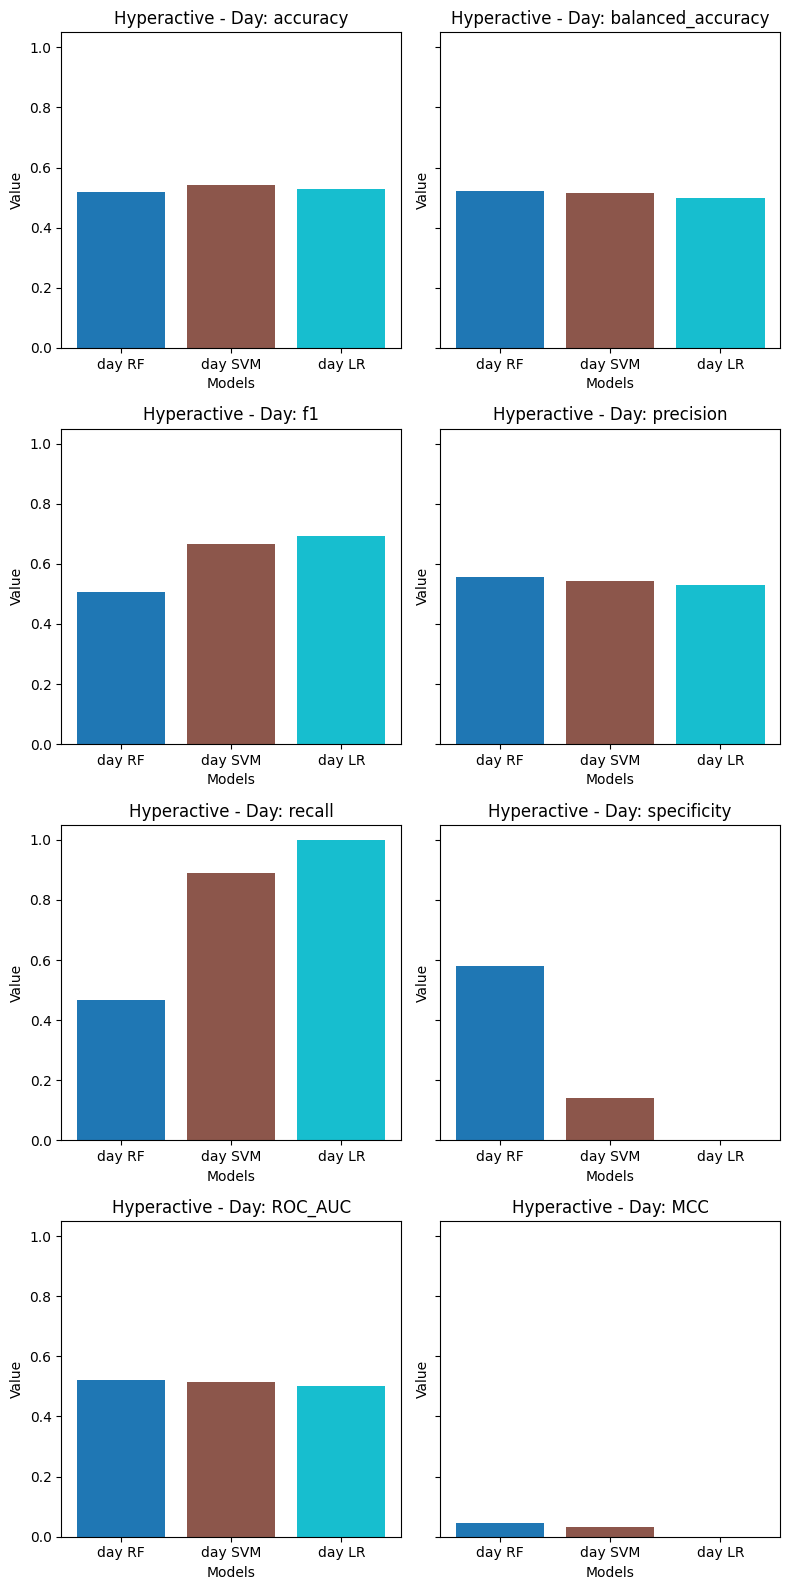

In [9]:
plot_final_results(results_hyperactive_day, "Hyperactive - Day", figsize=(8, 16))

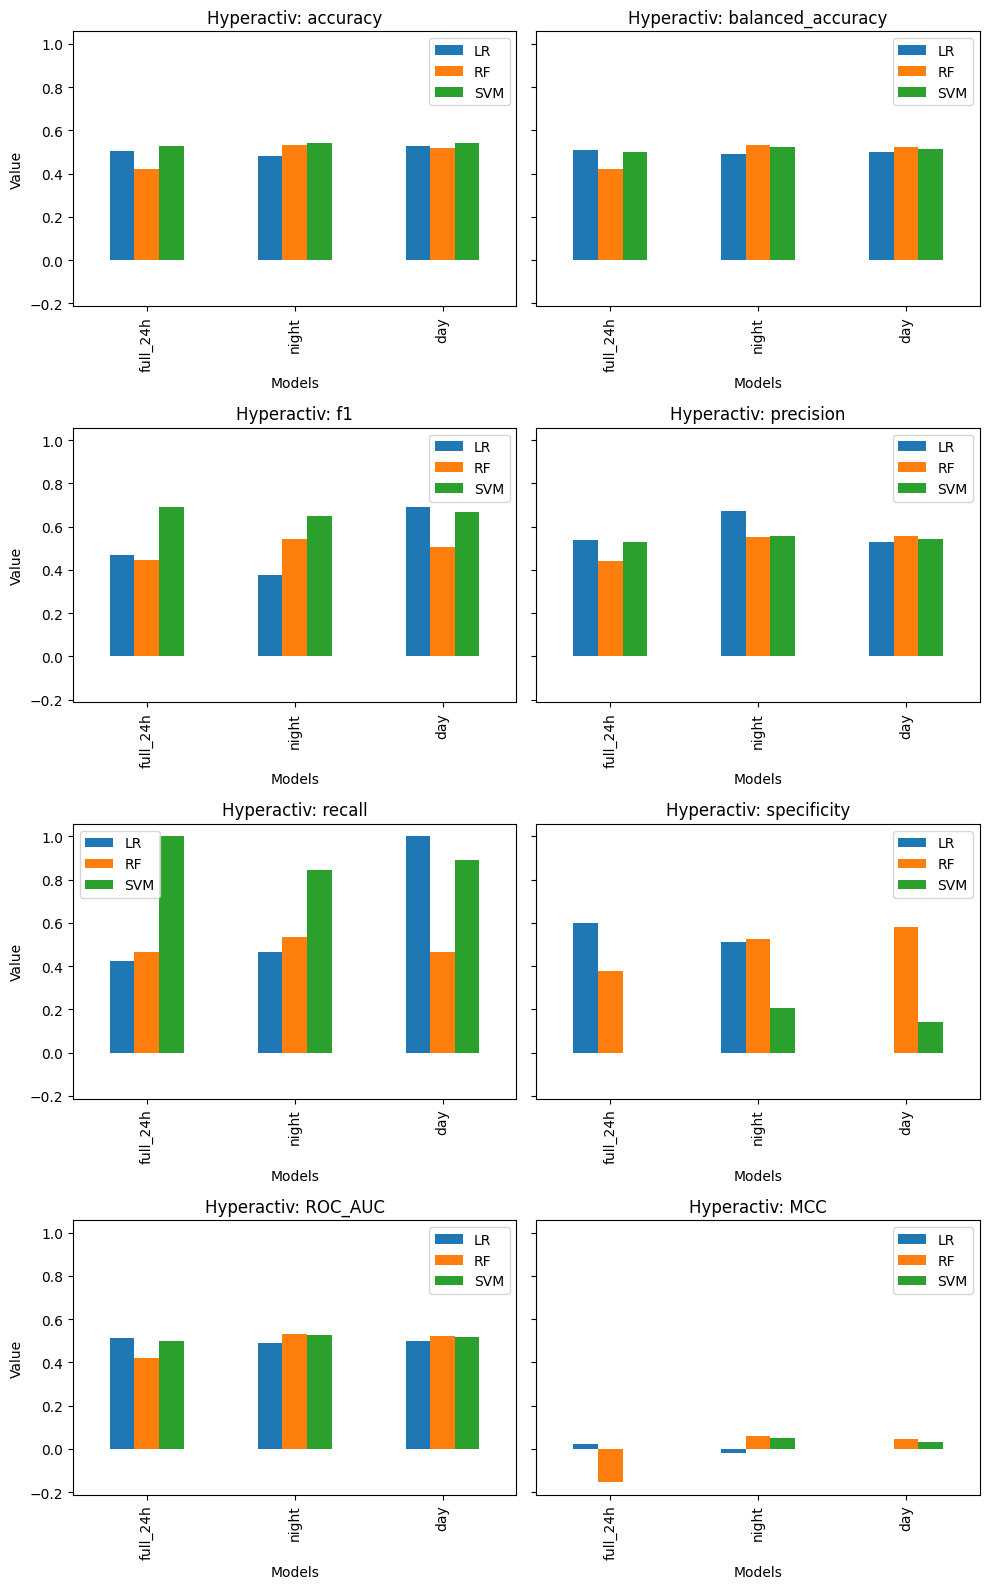

In [10]:
plot_model_comparison(all_models_results["hyperactiv"], "Hyperactiv", figsize=(10, 16))

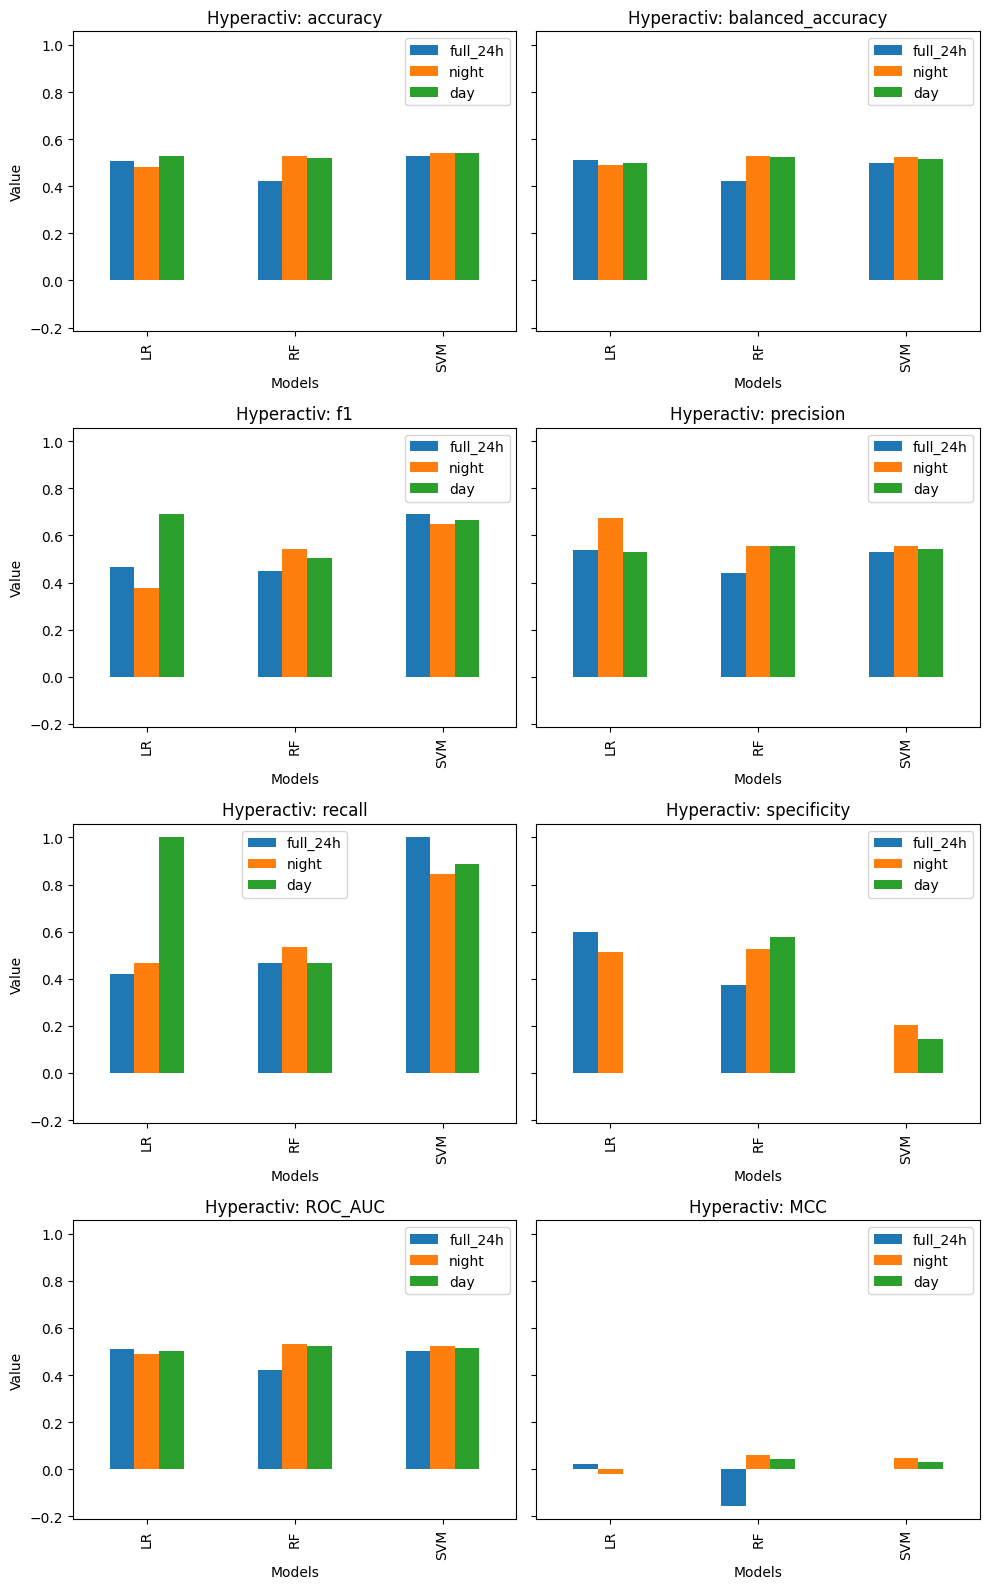

In [11]:
plot_day_night_full_comparison(all_models_results["hyperactiv"], "Hyperactiv", figsize=(10, 16))

### Depresjon

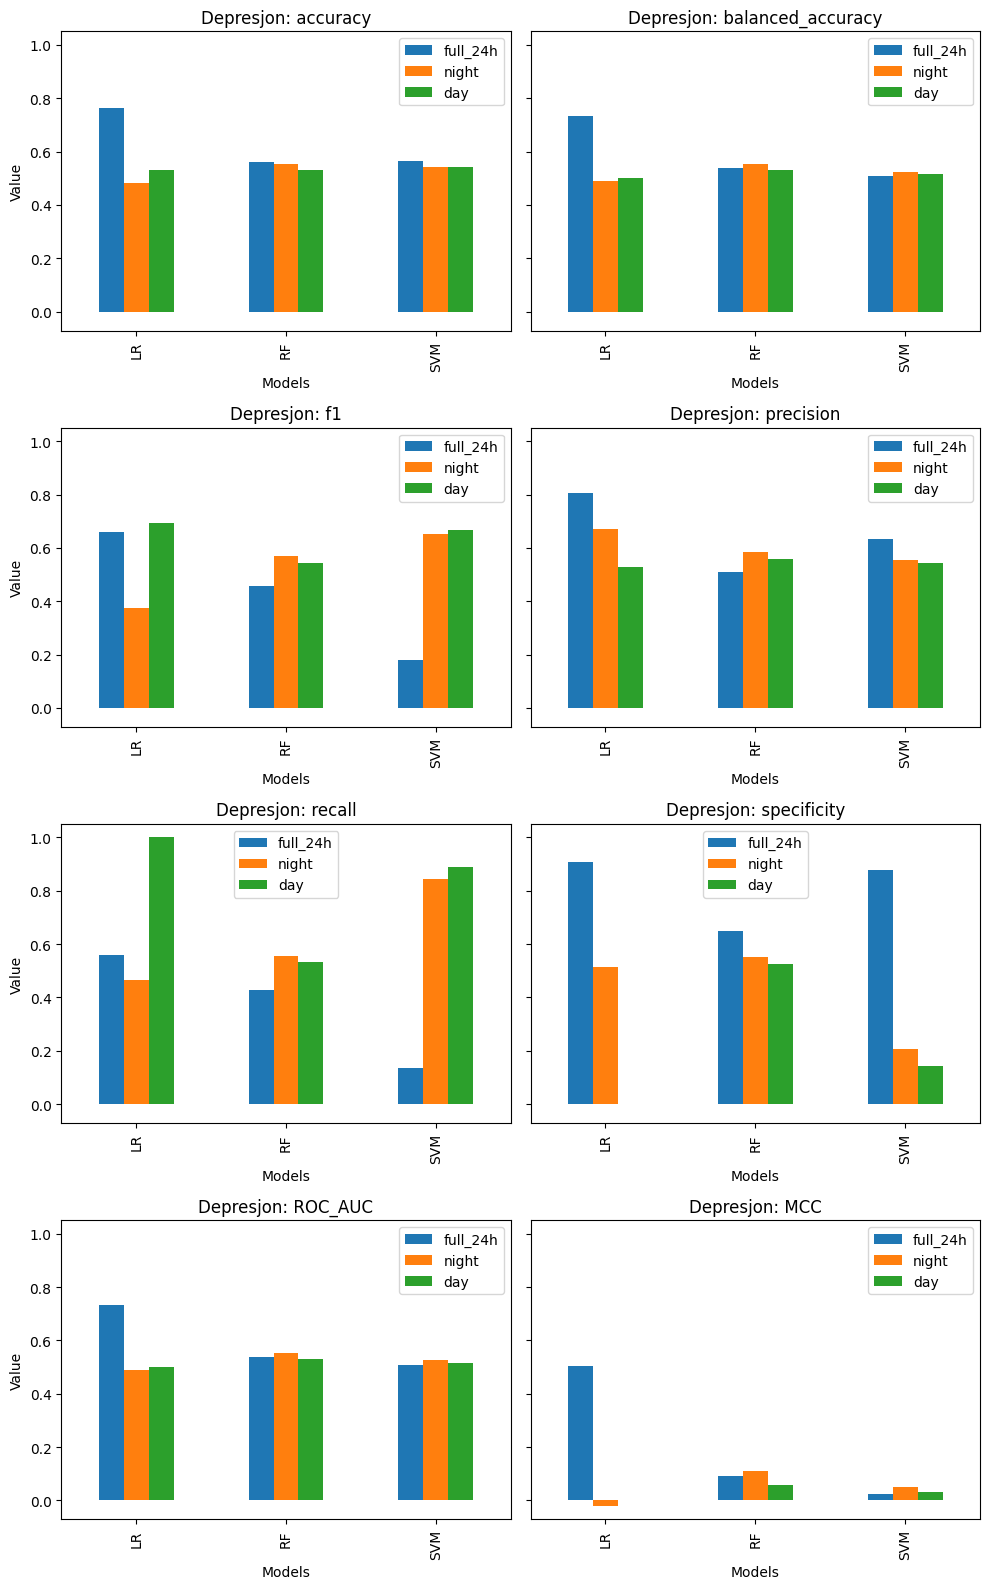

In [12]:
plot_day_night_full_comparison(all_models_results["depresjon"], "Depresjon", figsize=(10, 16))

### Psykose

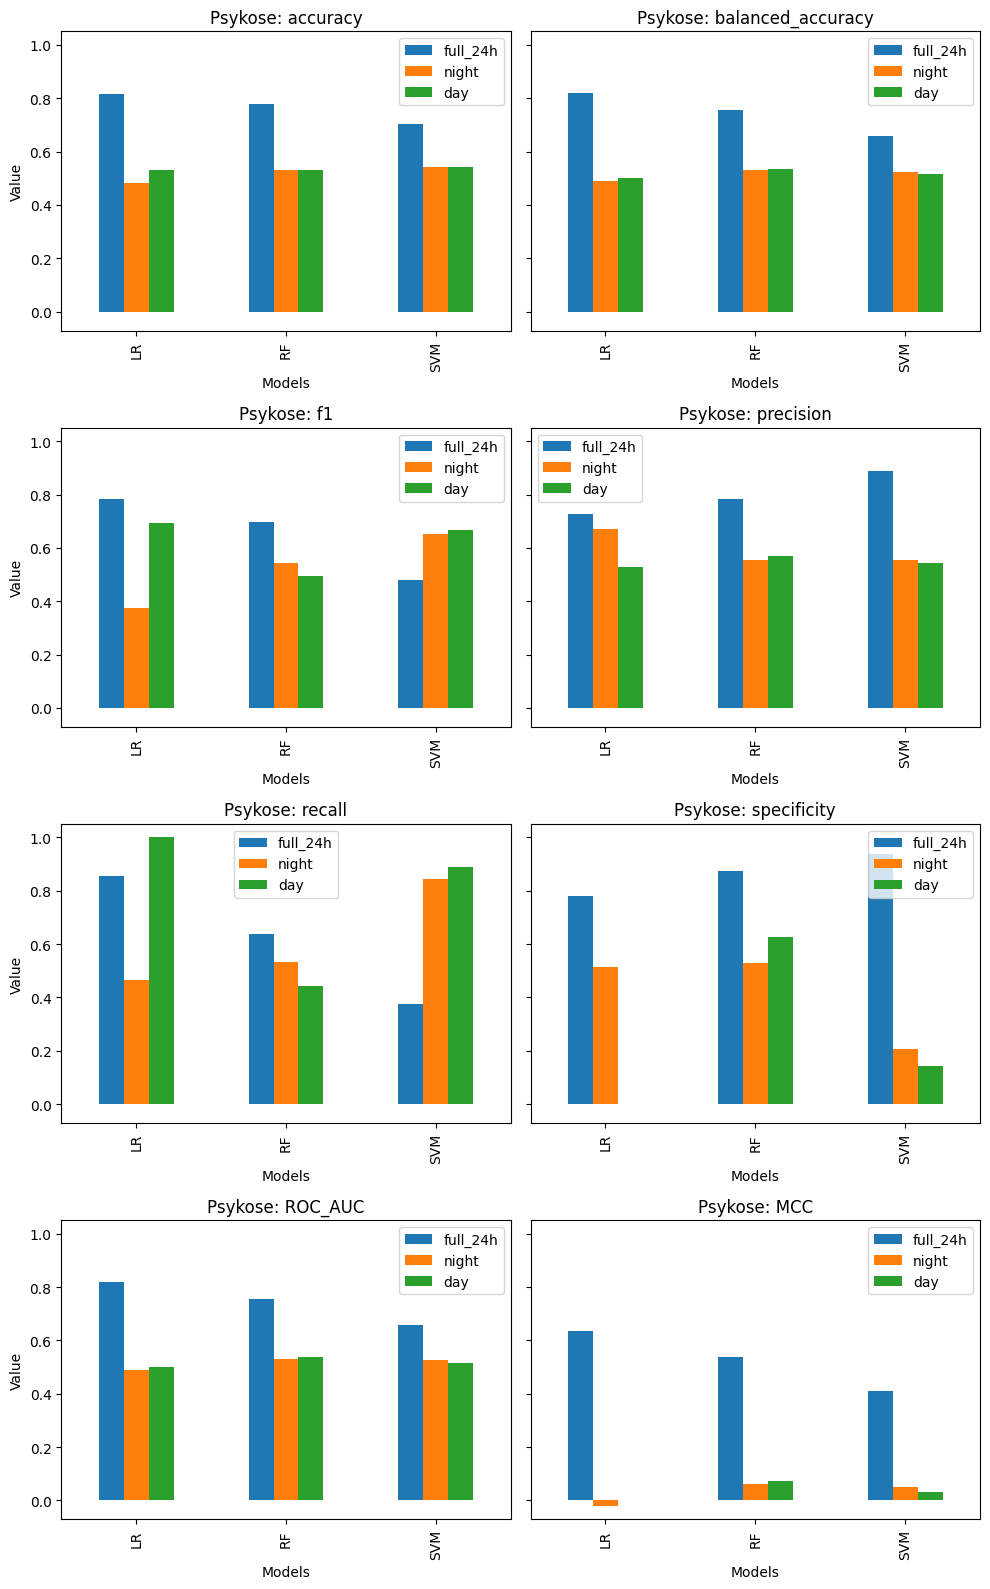

In [13]:
plot_day_night_full_comparison(all_models_results["psykose"], "Psykose", figsize=(10, 16))